# 1. Números pseudoaleatorios uniformemente distribuidos

__Generadores Uniformes:__ Generadores que entregan números uniformes en $X \sim U(0,1)$ distribuidos como:

$$
f_X(x)=\left\{\begin{aligned}
\frac{1}{b-a} ; & a \leq x \leq b \\
0 ; & \text { elsewhere }
\end{aligned}\right.
$$
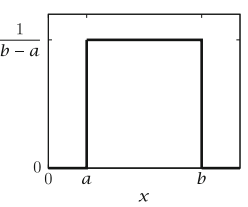
Un buen generador uniforme tiene las siguientes características:

* No correlacionado
* Periodo largo
* Uniforme e imparcial
* Uniformidad serial de la secuencia  (Ej: $(x_1,x_2), (x_2,x_3), (x_3,x_4), ...$)

El generador de enteros se puede convertir en números reales uniformemente distribuidos $\xi \sim U(0,1)$ usando las transformaciones:

$$
\begin{array}{lr}
\xi_i=x_i /m & {[0,1)} \\
\xi_i=x_i /(m-1) & {[0,1]} \\
\xi_i=\left(x_i+1\right) / m & (0,1] \\
\xi_i=\left(x_i+1 / 2\right) / m & (0,1)
\end{array}
$$

## 1.1 Generadores Linealmente Congruentes

Generadores congruentes se definen por la función de transición:
$$
x_{i+1} \equiv \phi\left(x_i, x_{i-1}, \ldots, x_{i-k+1}\right) \bmod m,
$$

Donde $x_i \in \mathbb{Z}_m=[0, m-1]$, y $i \in \mathbb{N}_0=\{0,1, \ldots\}$.

Comenzemos con el más simple.

__Generador Linealmente Congruente (LCG)__
$$
x_{i+1} \equiv\left(a x_i+c\right) \bmod m,
$$

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

In [3]:
seed = 7
m = 10
a = 7
c = 2
x = seed
for i in range (25):
    x = (a*x+c)%m
    print(x,end="  ")

1  9  5  7  1  9  5  7  1  9  5  7  1  9  5  7  1  9  5  7  1  9  5  7  1  

Pero el generador tiene sus limitaciones, por ejemplo para m = 31, a = 3, c = 0 y x0 = 9 se tiene un periodo de 30. Y su secuencia de pares no es uniforme. 

27  19  26  16  17  20  29  25  13  8  24  10  30  28  22  4  12  5  15  14  11  2  6  18  23  7  21  1  3  9  27  19  26  16  17  20  29  25  13  8  

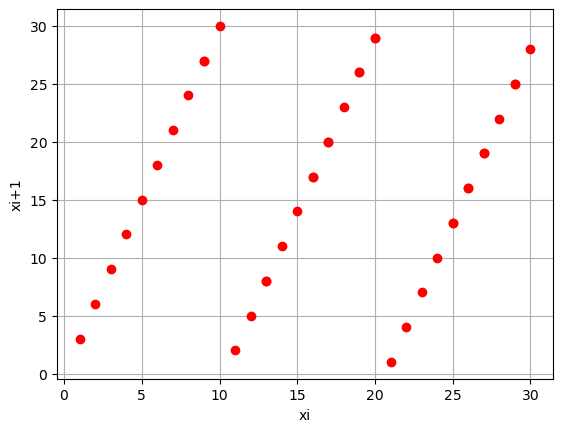

In [4]:
seed = 9
m = 31
a = 3
c = 0
x = seed
fig = plt.figure()
ax = fig.gca()
plt.xlabel('xi')
plt.ylabel('xi+1')

for i in range (40):
    y = (a*x+c)%m
    ax.plot(x, y,'ro')
    x = y
    print(x,end="  ")
    
plt.grid()
plt.show()
    

Algunos parámetro crean generadores cuya periodicidad y no uniformidad es apreciable en secuencia de trios.

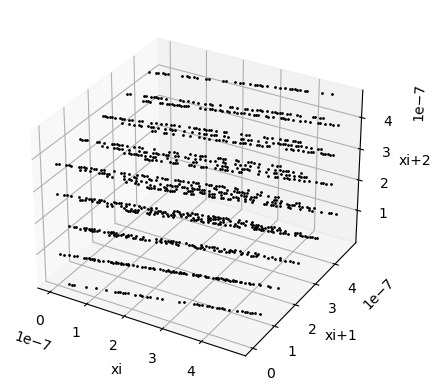

In [8]:
seed = 180
m = 2048
a = 1229
c = 1
x = seed
y = (a*x+c)%m

ax = plt.axes(projection='3d')
ax.set_xlabel('xi')
ax.set_ylabel('xi+1')
ax.set_zlabel('xi+2');


for i in range (1000):
    z = (a*y+c)%m
    ax.plot3D(x/2**32,y/2**32,z/2**32,marker="o", markersize=1, markeredgecolor="black",markerfacecolor="red")
    x = y
    y = z
    #print(x,end="  ")
    
plt.grid()
plt.show()

Generador de la librería 32-bit glibc.

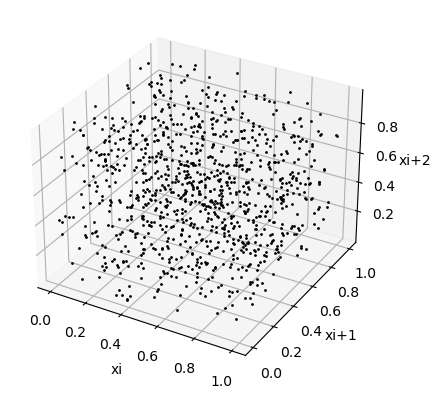

In [13]:
seed = 12345
m = 2**32
a = 1103515245
c = 123454
x = seed
y = (a*x+c)%m

ax = plt.axes(projection='3d')
ax.set_xlabel('xi')
ax.set_ylabel('xi+1')
ax.set_zlabel('xi+2');


for i in range (1000):
    z = (a*y+c)%m
    ax.plot3D(x/2**32,y/2**32,z/2**32,marker="o", markersize=1, markeredgecolor="black",markerfacecolor="red")
    x = y
    y = z
    #print(x,end="  ")
    
plt.grid()
plt.show()

Existen más familias de generadores LCG:

Add-with-Carry (AWC): $$x_{i} \equiv\left(x_{i-r}+x_{i-k}+c_{i-1}\right) \quad \bmod m, c_{i}=\left\lfloor\left(x_{i-r}+x_{i-k}+c_{i-1}\right) / m\right\rfloor$$

Subtract-with-Borrow (SWB): $$x_{i} \equiv\left(x_{i-r}-x_{i-k}-c_{i-1}\right) \quad \bmod m, c_{i}=\left\lfloor\left(x_{i-r}-x_{i-k}-c_{i-1}\right) / m\right\rfloor$$

Multiply-with-Carry (MWC): $$x_{i} \equiv\left(a x_{i-r}+c_{i-1}\right) \quad \quad \bmod m, c_{i}=\left\lfloor\left(a x_{i-r}+c_{i-1}\right) / m\right\rfloor$$

Y los generadores multiplo recursivos (MRG) definidos como:

$$
x_{i} \equiv\left(a_{1} x_{i-1}+\cdots+a_{k} x_{i-k}+c_{i}\right) \quad \bmod m,
$$

Un ejemplo de MRG es:


$$
x_{i} \equiv\left(107374182 x_{i-1}+104480 x_{i-5}\right) \quad \bmod \left(2^{31}-1\right) \text {. }
$$

El cual lo consideraremos como generador de números pseudo-aleatorios para las próximas aplicaciones.

In [66]:
def MR_generator(seed,n):
    lista = np.zeros(n)
    lista[0] = seed
    a1 = 107374182
    a2 = 104480
    m = 2**31-1
    c = 0
    for i in range(1,5):
        lista[i] = (a1*lista[i-1]+c)%m
    for i in range (5,n):
        lista[i] = (a1*lista[i-1]+a2*lista[i-5])%m
    return (lista+0.5)/m

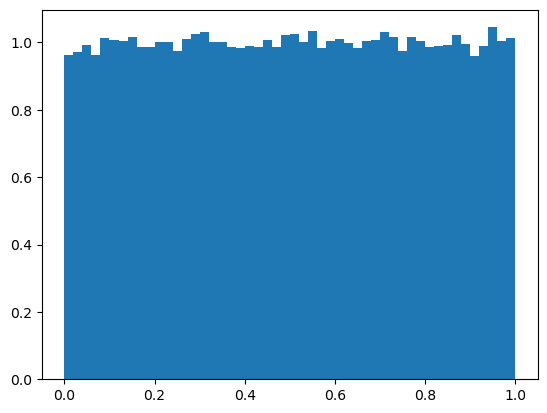

In [56]:
n = 100000
U1 = MR_generator(1599,n)
num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(U1, num_bins, density=2)

## 1.2 Generadores no-lineales congruentes

Generadores congruentes inversos (ICG):
$$
x_i \equiv\left(a \bar{x}_i{ }_1+b\right) \quad \text { mod } m,
$$
Generadores explicitamente congruentes inversos (EICG):
$$
x_i \equiv \overline{a\left(x_i+x_{i_0}\right)+b} \bmod m .
$$

## 1.3 Generadores Basados en Bit Shifts

Generadores conocidos como __Registro de desplazamiento de retroalimentación__ tienen la forma:
$$
b_i \equiv\left(a_p b_{i-p}+a_{p-1} b_{i-p+1}+\cdots+a_1 b_{i-1}\right) \quad \bmod 2,
$$

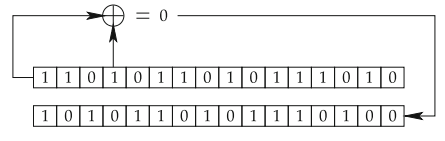

$$
x_i \equiv x_{i-p} \bigoplus A x_{i-p+q}
$$

La matriz A se puede usar para torcer las n-tuplas de bits antes de combinarlas lógicamente, lo que aumenta la aleatoriedad.

# 2. Distribuciones Continuas

## 2.1. Distribuciones Continuas en un circulo y una esfera

¿Cómo generamos puntos que están homogéneamente distribuidos dentro de un círculo? Homogeneidad significa: la razón de una pequeña probabilidad $dP$ de que el punto dibujado caiga en un pequeño elemento de superficie, a su área, $dS = r dr d\phi$, es igual a la razón de probabilidad 1 de que el punto caiga en todo el círculo, a su área, $πR_2$:

$$
\frac{\mathrm{d} P}{\mathrm{~d} S}=\frac{\mathrm{d} P}{r \mathrm{~d} r \mathrm{~d} \phi}=\frac{1}{\pi R^{2}} \quad \stackrel{R=1}{\Longrightarrow} \quad \frac{\mathrm{d} P}{\mathrm{~d}\left(r^{2}\right) \mathrm{d}(\phi / 2 \pi)}=1
$$

debemos generar uniformemente en $r^{2}$ de 0 a 1 y en $\phi$ de 0 a $2 \pi$. Necesitamos dos números aleatorios $U_{1}, U_{2} \sim U[0,1)$ y calculamos


$$
\left(r_{i}, \phi_{i}\right)=\left(R \sqrt{U_{1}}, 2 \pi U_{2}\right) .
$$


De la misma manera para la esfera,

$$
\frac{\mathrm{d} P}{\mathrm{~d} V}=\frac{\mathrm{d} P}{r^{2} \mathrm{~d} r \mathrm{~d}(\cos \theta) \mathrm{d} \phi}=\frac{3}{4 \pi R^{3}} \quad \stackrel{R=1}{\Longrightarrow} \quad \frac{\mathrm{d} P}{\mathrm{~d}\left(r^{3}\right) \mathrm{d}\left(\frac{1}{2} \cos \theta\right) \mathrm{d}(\phi / 2 \pi)}=1 .
$$


$$
\left(r_{i}, \theta_{i}, \phi_{i}\right)=\left(R \sqrt[3]{U_{1}}, \arccos \left(2 U_{2}-1\right), 2 \pi U_{3}\right)
$$

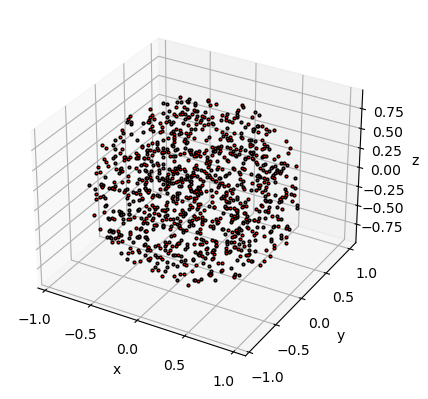

In [10]:
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

n = 1000
U1 = MR_generator(1051,n)
U2 = MR_generator(40585,n)
U3 = MR_generator(8965,n)
R = 1
for i in range (n):
    esf = [R*np.cbrt(U1[i]),np.arccos(2*U2[i]-1),2*np.pi*U3[i]]
    coord = [esf[0]*np.sin(esf[1])*np.cos(esf[2]), esf[0]*np.sin(esf[1])*np.sin(esf[2]), esf[0]*np.cos(esf[1])]
    ax.plot3D(coord[0],coord[1],coord[2],marker="o", markersize=2, markeredgecolor="black",markerfacecolor="red")



__¡Cuidado!__ Un error común es pensar que $\theta$ y $\phi$ se deben generar como $U(0, \pi)$ y $U(0,2 \pi)$, respectivamente. Pero esto no cumple la condición de homogeneidad.


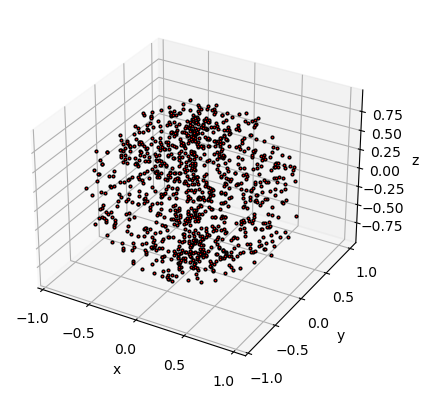

In [11]:
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
for i in range (n):
    esf = [R*np.cbrt(U1[i]),np.pi*U2[i],2*np.pi*U3[i]]
    coord = [esf[0]*np.sin(esf[1])*np.cos(esf[2]), esf[0]*np.sin(esf[1])*np.sin(esf[2]), esf[0]*np.cos(esf[1])]
    ax.plot3D(coord[0],coord[1],coord[2],marker="o", markersize=2, markeredgecolor="black",markerfacecolor="red")

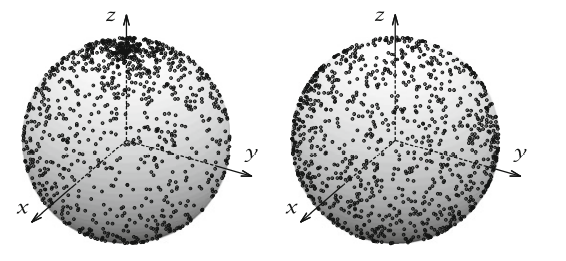

## 2.4. Método de la transformación inversa

Es un método para generar números aleatorios a partir de cualquier distribución de probabilidad utilizando su distribución acumulativa inversa.

Consiste en:
1. Dada una densidad de probabilidad $f_X$ hallar la función de distribución $F_x = P(X \leq x)$
2. Hallar su inversa $F_X^{-1}$
3. Generar un arreglo de números aleatorios U(0,1)
4. Calcular $X = F_X^{-1} (U)$

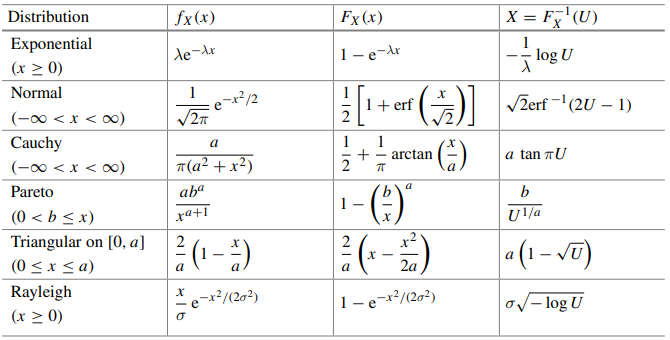

Probemos con la función exponencial:

__Distribución Exponencial__

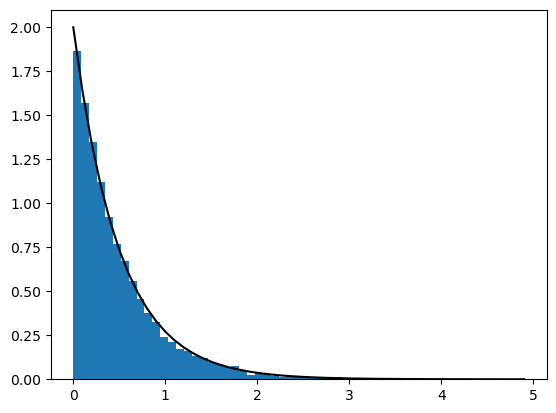

In [67]:
n = 10000
U1 = MR_generator(14851,n)
lamda = 2
x = np.arange(0,5,0.1)
y = lamda*np.exp(-lamda*x)
X = -np.log(1-U1)/lamda
num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(X, num_bins, density=2)
ax.plot(x, y, 'k-')

In [68]:
X


array([3.45789626e-06, 3.99251159e-01, 1.16281921e-01, ...,
       3.15644059e-01, 5.69450447e-01, 3.48513460e-01])

__Distribución Triangular__

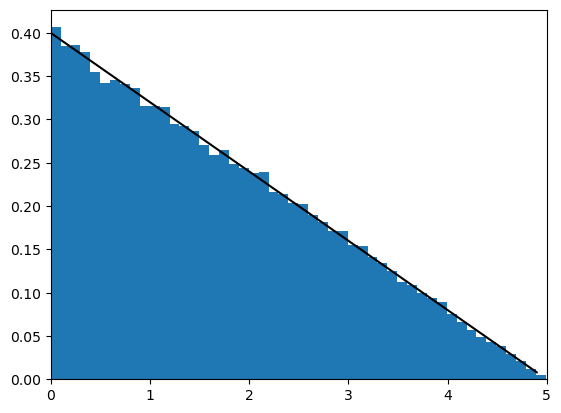

In [103]:
n = 100000
a = 5
U = MR_generator(14861,n)
x = np.arange(0,a,0.1)
y = 2*(1-x/a)/a
X = a*(1-np.sqrt(U))
num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(X, num_bins, density=2)
plt.xlim([0, a])
#plt.ylim([0, 4])
ax.plot(x, y, 'k-')

__Distribución de Rayleight__

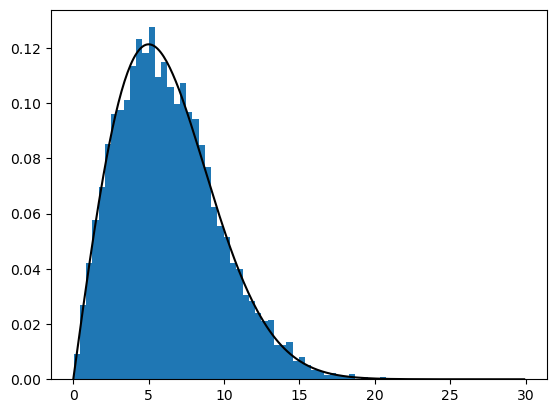

In [45]:
n = 10000
sigma = 5
U = MR_generator(14961,n)
x = np.arange(0,30,0.1)
y = (x/sigma**2)*np.exp(-x**2/(2*sigma**2))
X = sigma*np.sqrt(-2*np.log(1-U))
num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(X, num_bins, density=2)
#plt.xlim([0, a])
#plt.ylim([0, 4])
ax.plot(x, y, 'k-')

Ejemplo: Generador de radiación electromagnética dipolar. 

La distribución de la potencia radiada con respecto al ángulo sólido es $\mathrm{d} P / \mathrm{d} \Omega \propto \sin ^2 \theta$

$$
f_{\Theta}(\theta)=\frac{\mathrm{d} P}{\mathrm{~d} \theta}=\frac{3}{4} \sin ^3 \theta, \quad 0 \leq \theta \leq \pi,
$$

$$
F_{\Theta}(\theta)=\int_0^\theta f_{\Theta}\left(\theta^{\prime}\right) \mathrm{d} \theta^{\prime}=\frac{3}{4}\left[\frac{\cos ^3 \theta}{3}-\cos \theta+\frac{2}{3}\right] .
$$

 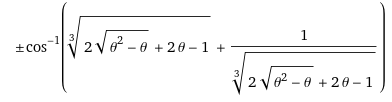

## 2.6 Método del rechazo

Dada g(x) hallar C>1, tal que f(x)< C g(x)

Luego:

1.Generar el valor x de la variable aleatoria X según la densidad g.

2.Genere el valor u de la variable aleatoria U según U(0, 1).

3.Si $u \leq f (x)/(Cg(x))$, asigne y = x (x es "aceptado"), de lo contrario, regrese al paso 1 (x es "rechazado").


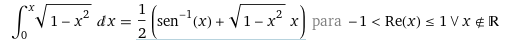

No salio :c

In [74]:
z = np.exp(-(x-5)**2/2)
C = max(z)
g = U*20


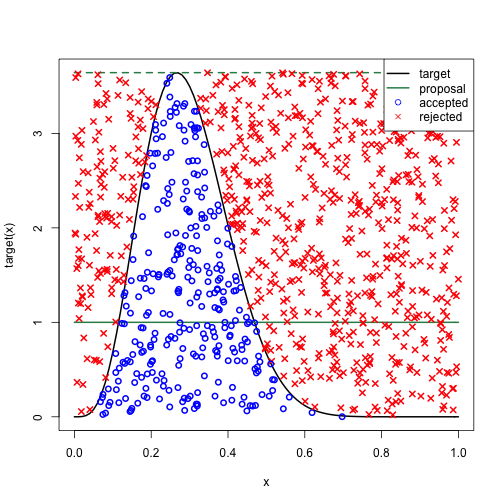

# 3. Generar verdaderos números aleatorios

[Hotbits](https://www.fourmilab.ch/hotbits/) es un generador de verdaderos números aleatorios; mantiene una muestra de cesio radiactivo, decayendo aleatoriamente a un estado excitado de bario, electrón y antineutrino con un tiempo de decaimiento de 30,17 años:

$$^{137}Cs \rightarrow ^{137} Ba^* + e^- + \overline{v}_e$$

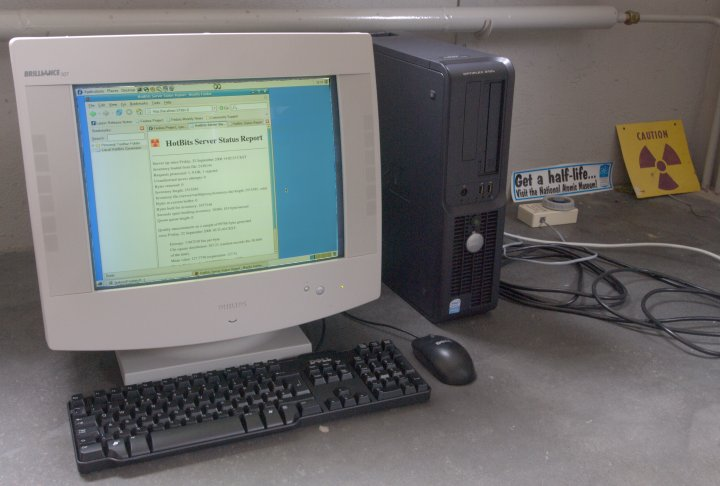

La secuencia de bits aleatorios funciona midiendo la diferencia entre dos pares de decaimiento:
* Si $t_1 = t_2$ la medida es descartada
* Si $t_1 < t_2$ la medida es 0
* Si $t_1 > t_2$ la medida es 1
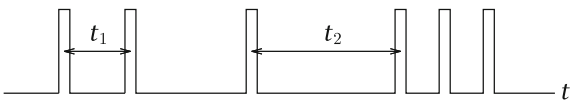

Por ejemplo, obtenemos:

1111011100100001101110100010110001001100110110011100111100000001 0100001010011111111001011101111001101001101110000100010110001111 ...

__Árbol binario__ utilizado para generar un número binario aleatorio de k dígitos

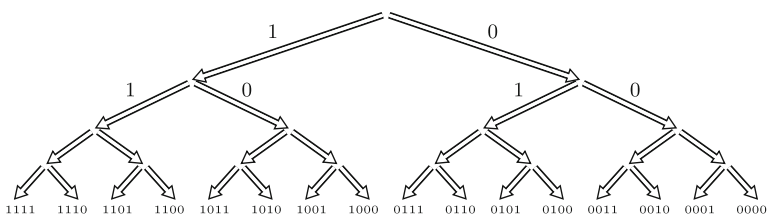

* Probabilidad izquieda (1) : p

* Probabilidad derecha (0) : 1-p

Valores $n_i$ correspondientes a las ramas atravesadas están dispuestas en un sistema binario de $k$-digitos $B_k=\left(n_{k-1} n_{k-2} \ldots n_1 n_0\right)_2$ y normalizado,
$$
X_k=N_k B_k=N_k \sum_{i=0}^{k-1} 2^i n_i, \quad N_k=\left(2^k-1\right)^{-1},
$$
Quedandonos con un evento aleatio $X_k$ de \[0,1).
Los digitos individuales $n_i$ toman valores de 0 o 1 con probabilidades $P_i=p \delta_{i, 1}+(1-p) \delta_{i, 0}$.
Como $E\left[n_i\right]=p$, entonces:
$$
E\left[X_k\right]=E\left[N_k \sum_{i=0}^{k-1} 2^i n_i\right]=N_k E\left[n_i\right] \sum_{i=0}^{k-1} 2^i=N_k p\left(2^k-1\right)=p
$$
La varianza de $X_k$ es
$$
\begin{aligned}
\operatorname{var}\left[X_k\right] &=E\left[X_k^2\right]-E\left[X_k\right]^2=N_k^2 \sum_{i=0}^{k-1} \sum_{j=0}^{k-1} 2^{i+j}(\underbrace{E\left[n_i n_j\right]}_{p \delta_{i, j}}-\underbrace{E\left[n_i\right] E\left[n_j\right]}_{p^2 \delta_{i, j}}) \\
&=N_k^2 p(1-p) \sum_{i=0}^{k-1} 4^i=N_k^2 p(1-p) \frac{4^k-1}{3}=\frac{p(1-p)}{3} \frac{2^k+1}{2^k-1} .
\end{aligned}
$$
Para $\rho=1 / 2$ uno tiene $E\left[X_k\right]=1 / 2$, mientras que $\lim _{k \rightarrow \infty} \operatorname{var}\left[X_k\right]=1 / 12$, como es esperado de una distribución uniforme.

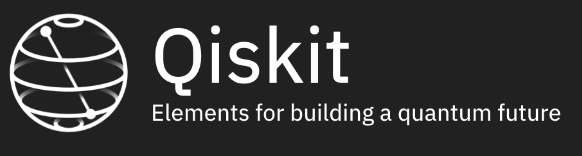
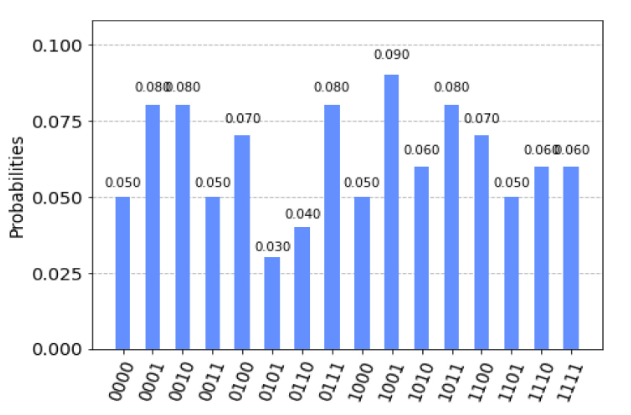